In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from fredapi import Fred
import matplotlib.pyplot as plt

In [2]:
fred = Fred(api_key='6cc00d6dd7a79e8de471491dc74cc1fe')

<Axes: >

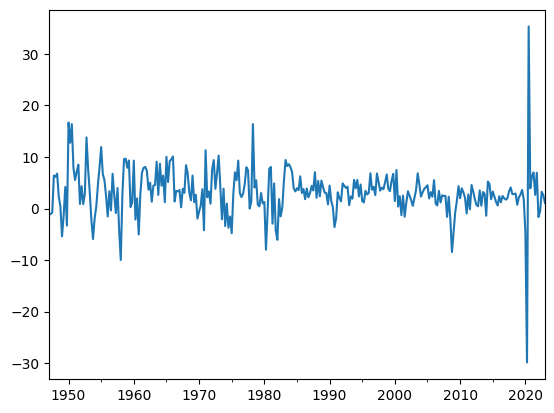

In [3]:
real_gdp = fred.get_series('GDPC1',units="pca")
real_gdp.name = 'real gdp'
real_gdp.plot()

In [33]:
real_gdp=pd.DataFrame(real_gdp)
real_gdp

(305, 2)

In [22]:
def identify_cycle_phase(x):
    if x > 0:
        return 1
    else :
        return 0
    

In [23]:
real_gdp['cycle_phase'] = real_gdp['real gdp'].apply(identify_cycle_phase)
real_gdp['real gdp'].fillna(method='ffill',inplace=True)
real_gdp=real_gdp.fillna(0)
real_gdp

,real gdp,cycle_phase
1947-01-01,0.00000,0
1947-04-01,-1.06256,0
1947-07-01,-0.82346,0
1947-10-01,6.40546,1
1948-01-01,6.15392,1
...,...,...
2022-01-01,-1.63128,0
2022-04-01,-0.57728,0
2022-07-01,3.24334,1
2022-10-01,2.57407,1


In [24]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

In [25]:
train, test = train_test_split(real_gdp, test_size=0.2, random_state=42)

In [26]:
X_train = train['real gdp'].values.reshape(-1, 1)
y_train = train['cycle_phase'].values

X_test = test['real gdp'].values.reshape(-1, 1)
y_test = test['cycle_phase'].values

In [27]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in lr_list:
    model_gbm = GradientBoostingClassifier(n_estimators=5000,
                                        learning_rate=learning_rate,
                                        max_depth=3,
                                        subsample=0.5,
                                        validation_fraction=0.1,
                                        n_iter_no_change=20,
                                        max_features='log2',
                                        verbose=0)
    model_gbm.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(model_gbm.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(model_gbm.score(X_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 1.000
Accuracy score (validation): 1.000
Learning rate:  0.075
Accuracy score (training): 1.000
Accuracy score (validation): 1.000
Learning rate:  0.1
Accuracy score (training): 1.000
Accuracy score (validation): 1.000
Learning rate:  0.25
Accuracy score (training): 1.000
Accuracy score (validation): 1.000
Learning rate:  0.5
Accuracy score (training): 0.996
Accuracy score (validation): 1.000
Learning rate:  0.75
Accuracy score (training): 1.000
Accuracy score (validation): 1.000
Learning rate:  1
Accuracy score (training): 1.000
Accuracy score (validation): 1.000


In [28]:
from sklearn.metrics import classification_report, confusion_matrix

In [29]:
model_gbm2 = GradientBoostingClassifier(n_estimators=5000,
                                        learning_rate=0.075,
                                        max_depth=3,
                                        subsample=0.5,
                                        validation_fraction=0.1,
                                        n_iter_no_change=20,
                                        max_features='log2',
                                        verbose=0)
model_gbm2.fit(X_train, y_train)
prediction=model_gbm2.predict(real_gdp[real_gdp.columns[:-1]])

c:\Users\admin\Documents\GitHub\projet-de-fin-d-annee\.venv\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


In [ ]:
print("Classification Report")
print(classification_report(real_gdp[real_gdp.columns[-1]], prediction))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00       259

    accuracy                           1.00       305
   macro avg       1.00      1.00      1.00       305
weighted avg       1.00      1.00      1.00       305



c:\Users\admin\Documents\GitHub\projet-de-fin-d-annee\.venv\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


<Axes: >

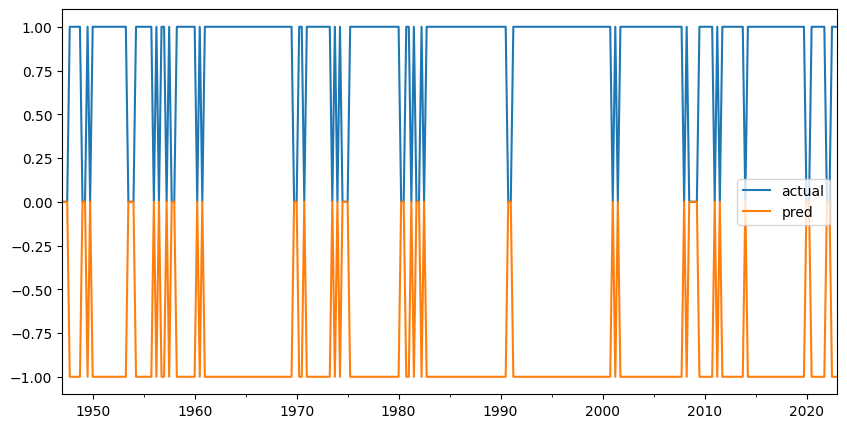

In [34]:
results=pd.DataFrame()
results['actual']=real_gdp[real_gdp.columns[-1]]
results['pred']=-model_gbm.predict(real_gdp[real_gdp.columns[:-1]])
results.plot(figsize=(10,5))